In [1]:
from PIL import Image
import numpy as np
import scipy.stats as stats
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
basedir = "./pics_/"
filelist = os.listdir(basedir)
filelist.sort()
print (f"{len(filelist)} files found in {basedir}")

csvfname = "outputs_curr.csv"
dx = 2
dy = 2
n = np.math.factorial(dx*dy)

40 files found in ./pics_/


In [3]:
def nse(p,n):  # normalized shannon entropy
    #return (stats.entropy(p) / np.log(n)
    s1 = 0
    for prob1 in p:
        s1 = s1 + prob1*np.log(1/prob1)
    return s1 / np.log(n)   
    # this is equivalent to : 
    # stats.entropy(p) / np.log(n)

def D(p, u): # equation 3
    n = p.shape[0]
    S = stats.entropy
    return S((p+u)/2) - S(p)/2 - S(u)/2

- **Normalized Permutation Entropy (H)** quantifies the degree of disorder in the pixel arrangement of an image: Values close to 1 indicate that pixels appear at random, while values close to zero indicate that pixels appear almost always in the same order.
- **Statistical complexity (C)** measures the “structural” complexity present in an image: It is zero for both extremes of order and disorder in the pixel arrangement, and it is positive when an image presents more-complex spatial patterns.


In [4]:
with open(csvfname, "w") as ofh:
    s1 = "filename,complexity,entropy"
    #print (s1)
    ofh.write(s1+"\n")
    for fnn in filelist:
        # data preparation etc.
        filename = basedir+fnn
        img = Image.open(filename)
        idata = np.asarray(img)
        idata = np.uint32(np.mean(idata, axis=2)) # arithmetic mean, as done by the paper
        #img2 = Image.fromarray(idata)    
        COLMAX, ROWMAX = img.size # Get image size (width, height) i.e. column followed by row

        # ==== algorithm begins ====

        argsort_results = np.uint32(np.zeros([(ROWMAX-1)*(COLMAX-1), 4]))
        acounter = 0
        for i in np.arange(0, ROWMAX-1, 1):
            for j in np.arange(0, COLMAX-1, 1):
                wflat = idata[i:i+dx, j:j+dy].flatten()  # find the "ordinal pattern" (1-dimensional)
                argsort1 = np.uint32(np.argsort(wflat, kind='stable')) # in case of tie, preserve original order
                argsort_results[acounter] = argsort1 # save the sort results for this iteration
                acounter = acounter+1
        elements, counts = np.unique(argsort_results, axis=0, return_counts=True)
        p = counts / argsort_results.shape[0]  # probability distribution, divide counts by total
        h = nse(p,n) # normalized shannon entropy... equation 1
        
        # complexity calculation begins here
        Dstar = -0.5 * ( (n+1)/n*np.log(n+1) + np.log(n) - 2*np.log(2*n) ) # equation 4
        u = np.array([1/n]*elements.shape[0]) # uniform distribution
        C = (D(p,u) * h) / Dstar # Equation 2

        # ==== algoithm ends ====
        s2 = f"{fnn},{C:.10f},{h:.10f}"
        ofh.write(s2+"\n")
        print (f"{filename} done")

n=24
./pics_/UL (1).png done
n=24
./pics_/UL (10).png done
n=24
./pics_/UL (11).png done
n=24
./pics_/UL (12).png done
n=24
./pics_/UL (13).png done
n=24
./pics_/UL (14).png done
n=24
./pics_/UL (15).png done
n=24
./pics_/UL (16).png done
n=24
./pics_/UL (17).png done
n=24
./pics_/UL (18).png done
n=24
./pics_/UL (19).png done
n=24
./pics_/UL (2).png done
n=24
./pics_/UL (20).png done
n=24
./pics_/UL (21).png done
n=24
./pics_/UL (22).png done
n=24
./pics_/UL (23).png done
n=24
./pics_/UL (24).png done
n=24
./pics_/UL (25).png done
n=24
./pics_/UL (26).png done
n=24
./pics_/UL (27).png done
n=24
./pics_/UL (28).png done
n=24
./pics_/UL (29).png done
n=24
./pics_/UL (3).png done
n=24
./pics_/UL (30).png done
n=24
./pics_/UL (31).png done
n=24
./pics_/UL (32).png done
n=24
./pics_/UL (33).png done
n=24
./pics_/UL (34).png done
n=24
./pics_/UL (35).png done
n=24
./pics_/UL (36).png done
n=24
./pics_/UL (37).png done
n=24
./pics_/UL (38).png done
n=24
./pics_/UL (39).png done
n=24
./pics_/

In [6]:
cedf = pd.read_csv(csvfname)
cedf.head()

,filename,complexity,entropy
0,UL (1).png,0.233501,0.610146
1,UL (10).png,0.215779,0.604255
2,UL (11).png,0.207864,0.639905
3,UL (12).png,0.180320,0.710309
4,UL (13).png,0.226379,0.617571


In [7]:
x = cedf['entropy']
y = cedf['complexity']

reg_result = stats.linregress(x, y)
xline = np.linspace(x.min(),x.max(),1000)
# y = mx + c
yline = reg_result.slope*xline + reg_result.intercept

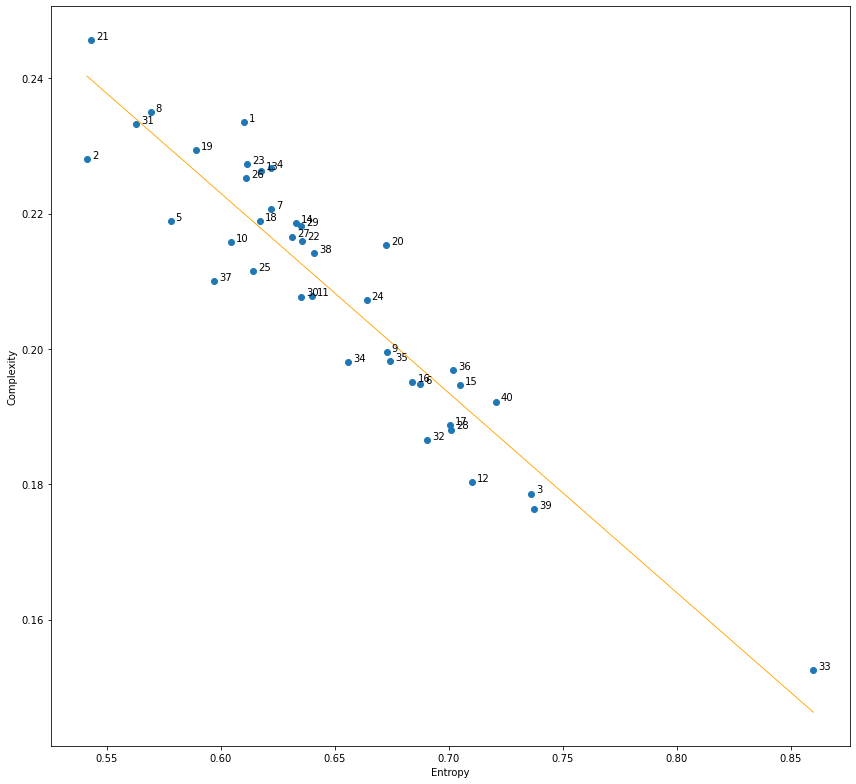

In [24]:
labels = cedf['filename']
labels = [s1[s1.find("(")+1:s1.find(")")] for s1 in labels] # only numbers, discard "UL" and ".png"

f = plt.figure(figsize=(12,11))
ax = f.gca()
ax.scatter(x, y)
ax.plot(xline,yline,color='orange',linewidth=0.9)

for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]), xytext = (5,1), textcoords="offset points") # https://stackoverflow.com/a/60786569

ax.set_ylabel("Complexity")
ax.set_xlabel("Entropy")

plt.tight_layout()
f.savefig("plot1.png", facecolor="white")

In [9]:
reg_result

LinregressResult(slope=-0.29502803081038037, intercept=0.40001780548161797, rvalue=-0.9339980332169298, pvalue=1.417474974886786e-18, stderr=0.018307623529107735, intercept_stderr=0.011922337178567149)